# Importing Libraries

In [1]:
# Imports libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor,
                              GradientBoostingRegressor)
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn import tree

In [2]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initaliasing Data

In [3]:
featureNames = np.array(["Class Name 1", "Class Name 2", "Class Name 3", "Class Name 4"])

# 2D array of data entries (Each row is a sample)
xData = np.array([[ np.NaN,  0.40015721,  0.97873798,  2.2408932],
                 [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
                 [-0.10321885,  0.4105985,  0.14404357,  1.45427351],
                 [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
                 [ 1.49407907, -0.20515826,  0.3130677,  -0.85409574],
                 [-2.55298982,  0.6536186,   0.8644362,  -0.74216502]])

# Outcomes of data entries
yData = np.array([49.82290745, 4.87728597, 11.91487464,
                  19.75307803, 23.60700003, -29.98278439])

# Data that you are predicting for
xPrediction = np.array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932]])

In [4]:
# Gives example data
from sklearn.datasets import make_regression
data = make_regression(n_features=4, n_samples=1000, n_informative=4)

featureNames = np.array(["Class Name 1", "Class Name 2", "Class Name 3", "Class Name 4"])
xData, yData = data

xPrediction = np.array([[0,0,0,0]])

# Model

In [18]:
# Uses a grid search to determine the best hyperparameters to maximise the scoring metric
# Uses 5 fold cross-validation to calculate the error
modelSearch = GridSearchCV(
    RandomForestRegressor(),
    param_grid={
      # 'n_estimators': [i for i in range(50, 500, 100)],
      # 'max_depth': [4, 5, 6, 7, 8, None],
      # 'min_samples_split': [i for i in range(5)]
    },
    scoring='neg_mean_squared_error'
)

# model = RandomForestRegressor()
# model = AdaBoostRegressor()
# model = GradientBoostingRegressor()

In [19]:
# Fits model with the data
modelSearch.fit(xData, yData)
model = modelSearch.best_estimator_

print(f'Best Params: {modelSearch.best_params_}')

# Calculates the score
MSE = modelSearch.best_score_
print(f'MSE: {-MSE}')

yPrediction = model.predict(xPrediction)
print(f'Predicted data for {xPrediction} is {yPrediction}')

Best Params: {}
MSE: 1047.3300225977503
Predicted data for [[0 0 0 0]] is [-11.60001217]


In [20]:
# Provides relative Gini importances
importances = model.feature_importances_
print(f'The relative gini importances of the features {featureNames} are {importances}')

# Alernative importance metric # https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
from sklearn.inspection import permutation_importance
result = permutation_importance(model, xData, yData, n_repeats=10)
print(result.importances_mean)
###################################################

The relative gini importances of the features ['Class Name 1' 'Class Name 2' 'Class Name 3' 'Class Name 4'] are [0.0127028  0.39645921 0.20501469 0.3858233 ]
[0.00854933 0.79366103 0.39422549 0.69484614]


# Plotting Representation

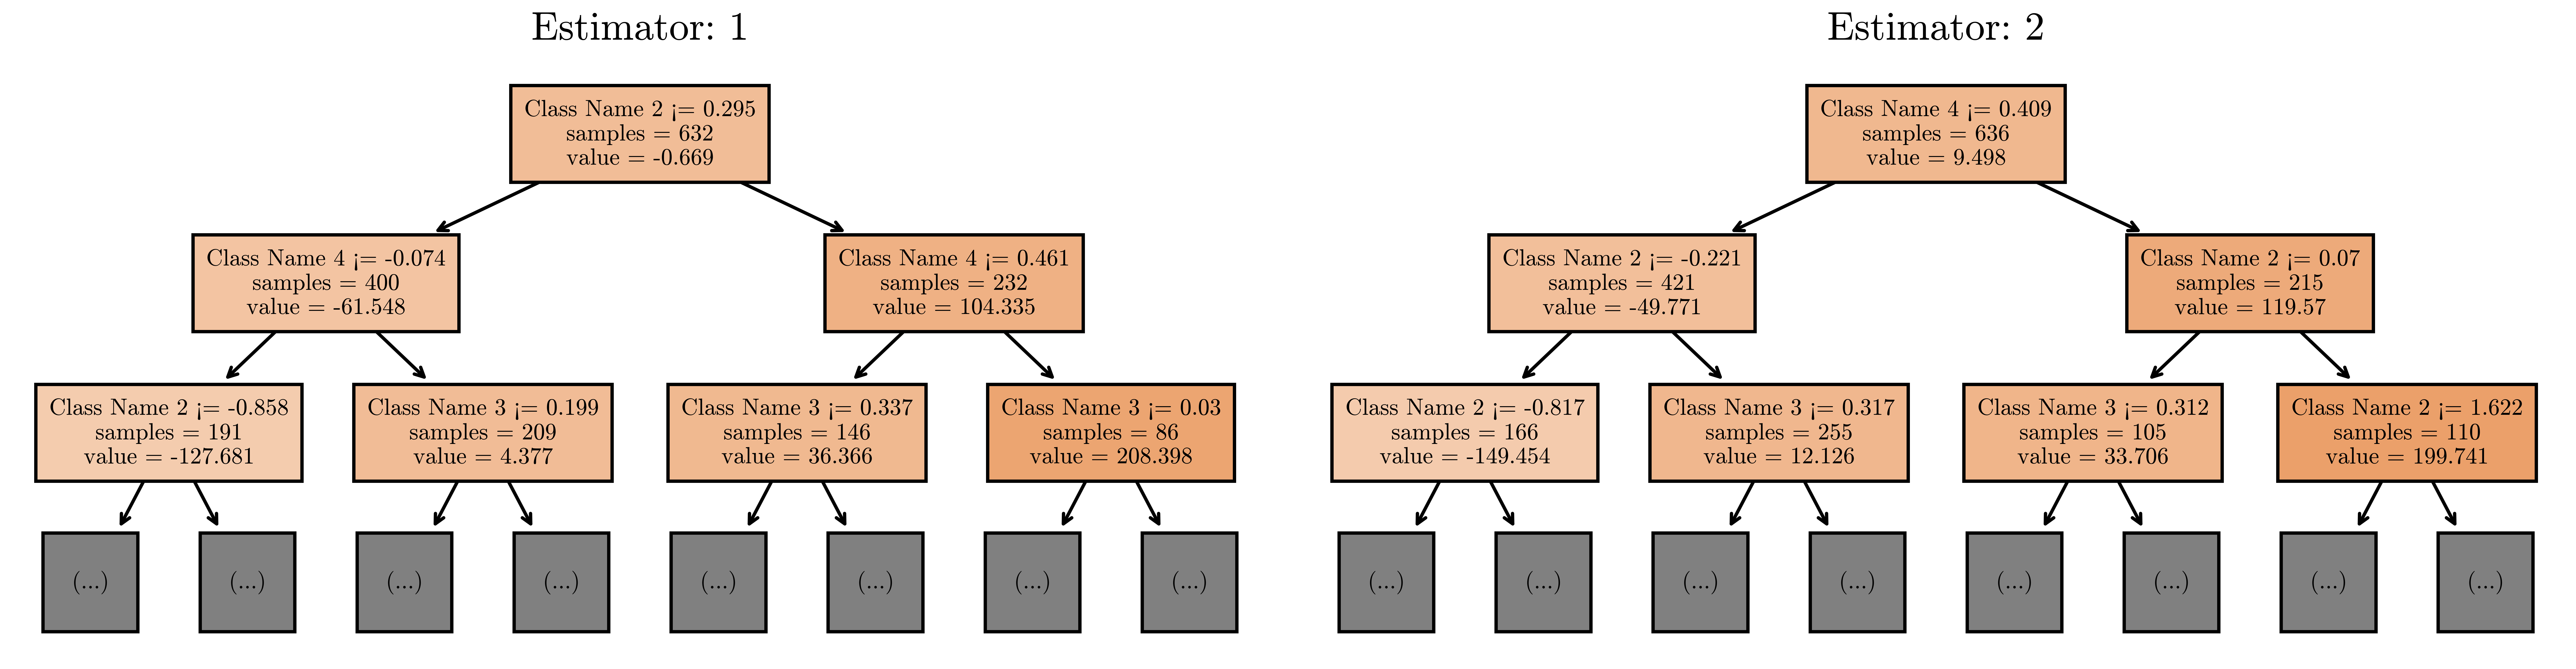

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,3), dpi=1000)

# Loops over the first 2 decision trees and renders them to depth 2
for i in range(2):
    tree.plot_tree(model.estimators_[i],
                   feature_names=featureNames,
                   filled=True,
                   ax=axes[i],
                   max_depth=2,
                   fontsize=7,
                   impurity=False);

    axes[i].set_title(f'Estimator: {i + 1}', fontsize=12)

plt.tight_layout()

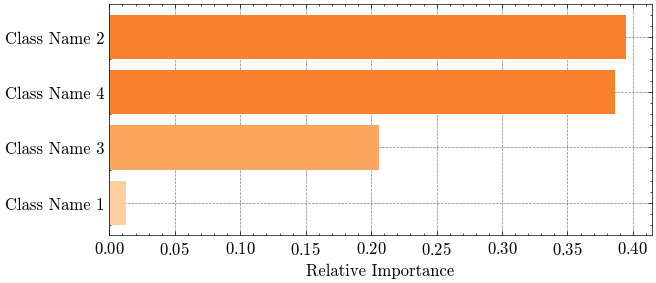

In [9]:
plt.figure(figsize=(7,3))
cMap = plt.get_cmap('Oranges')

# Contains indices of sorted importances
indices = np.argsort(importances)

# Plots sorted importances in bar graph
plt.barh(range(len(indices)), importances[indices],
         color=cMap(importances[indices] * 3 / 4 + 0.25))

plt.yticks(range(len(indices)), featureNames[indices], fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Relative Importance', fontsize=12)

plt.show()

# Old Stuff

In [ ]:
# score = model.score(xTest, yTest)



# paramDist = {'n_estimators': randint(50,500),
#               'max_depth': randint(1,20)}

# parameterSearch = RandomizedSearchCV(model,
#                                 param_distributions = paramDist,
#                                 n_iter=10,
#                                 cv=10)

# parameterSearch.fit(xTrain, yTrain)
# print('Best hyperparameters:',  parameterSearch.best_params_)
# model = parameterSearch.best_estimator_



# model = BaggingRegressor()
# model = ExtraTreesRegressor()
# model = StackingRegressor()
# model = VotingRegressor()
# model = HistGradientBoostingRegressor()



from scipy.stats import randint
# ExtraTreesRegressor, , RandomForestRegressor, StackingRegressor,
# VotingRegressor, HistGradientBoostingRegressor)




# Test ###############################################
#######################################################
########################################################
from sklearn.inspection import permutation_importance
result = permutation_importance(model, xTest, yTest, n_repeats=10)
print(result.importances_mean)



https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined